In [1]:
import pandas as pd 
import numpy as np

In [2]:
heart=pd.read_csv('heart.csv')

In [3]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


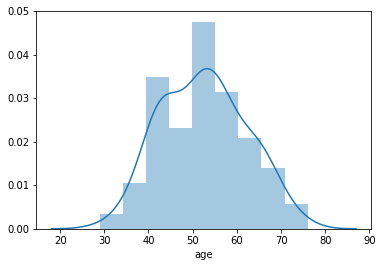

In [5]:
import seaborn as sns
%matplotlib inline
sns.distplot(heart[heart['target']== 1]['age'])

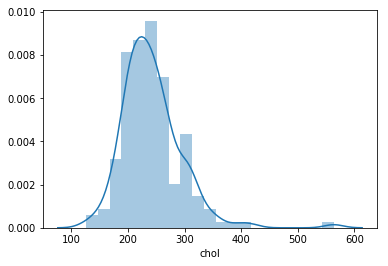

In [6]:
sns.distplot(heart[heart['target']==1]['chol'])

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
tree=DecisionTreeClassifier()

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X=heart.drop('target',axis=True)
y=heart['target']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [13]:
predictions=tree.predict(X_test)

In [14]:
from sklearn.metrics import classification_report,confusion_matrix

In [15]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.65      0.79      0.71        42
           1       0.82      0.69      0.75        58

   micro avg       0.73      0.73      0.73       100
   macro avg       0.73      0.74      0.73       100
weighted avg       0.75      0.73      0.73       100



In [16]:
print(confusion_matrix(y_test,predictions))

[[33  9]
 [18 40]]


In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
reg=LogisticRegression()

In [19]:
reg.fit(X_train,y_train)

C:\Users\Akanksha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
pred=reg.predict(X_test)

In [21]:
from sklearn.metrics import classification_report,confusion_matrix

In [22]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77        42
           1       0.84      0.81      0.82        58

   micro avg       0.80      0.80      0.80       100
   macro avg       0.79      0.80      0.80       100
weighted avg       0.80      0.80      0.80       100



In [23]:
print(confusion_matrix(y_test,pred))

[[33  9]
 [11 47]]


In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
random=RandomForestClassifier()

In [26]:
random.fit(X_train,y_train)

C:\Users\Akanksha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [27]:
predictions=random.predict(X_test)

In [28]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.83      0.78        42
           1       0.87      0.78      0.82        58

   micro avg       0.80      0.80      0.80       100
   macro avg       0.80      0.80      0.80       100
weighted avg       0.81      0.80      0.80       100



In [29]:
print(confusion_matrix(y_test,predictions))

[[35  7]
 [13 45]]


In [30]:
from sklearn.svm import SVC

In [31]:
svc=SVC(C=100,gamma=0.0001)

In [32]:
svc.fit(X_train,y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [33]:
pred=svc.predict(X_test)

In [34]:
print(confusion_matrix(y_test,pred))

[[32 10]
 [11 47]]


In [35]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.83      0.78        42
           1       0.87      0.78      0.82        58

   micro avg       0.80      0.80      0.80       100
   macro avg       0.80      0.80      0.80       100
weighted avg       0.81      0.80      0.80       100

